In [1]:
import pandas as pd
import numpy as np

#import data
total_data2024 = pd.read_excel("../data/raw/all_alpha_24.xlsx")
total_data2023 = pd.read_excel("../data/raw/all_alpha_23.xlsx")
total_data2022 = pd.read_excel("../data/raw/all_alpha_22.xlsx")
total_data2021 = pd.read_excel("../data/raw/all_alpha_21.xlsx")
total_data2020 = pd.read_excel("../data/raw/all_alpha_20.xlsx")
total_data2019 = pd.read_excel("../data/raw/all_alpha_19.xlsx")
total_data2018 = pd.read_excel("../data/raw/all_alpha_18.xlsx")
total_data2017 = pd.read_excel("../data/raw/all_alpha_17.xlsx")
total_data2016 = pd.read_excel("../data/raw/all_alpha_16.xlsx")
total_data2015 = pd.read_excel("../data/raw/all_alpha_15.xlsx")
total_data2014 = pd.read_excel("../data/raw/all_alpha_14.xlsx")
total_data2013 = pd.read_excel("../data/raw/all_alpha_13.xlsx")
total_data2012 = pd.read_excel("../data/raw/all_alpha_12.xlsx")
total_data2011 = pd.read_excel("../data/raw/all_alpha_11.xlsx")
total_data2010 = pd.read_excel("../data/raw/all_alpha_10.xls")
total_data2009 = pd.read_excel("../data/raw/all_alpha_09.xls")
total_data2008 = pd.read_excel("../data/raw/all_alpha_08.xls")
total_data2007 = pd.read_excel("../data/raw/all_alpha_07.xls")
total_data2006 = pd.read_excel("../data/raw/all_alpha_06.xls")
total_data2005 = pd.read_excel("../data/raw/all_alpha_05.xls")
total_data2004 = pd.read_excel("../data/raw/all_alpha_04.xls")
total_data2003 = pd.read_excel("../data/raw/all_alpha_03.xls")
total_data2002 = pd.read_excel("../data/raw/all_alpha_02.xls")
total_data2001 = pd.read_excel("../data/raw/all_alpha_01.xls")
total_data2000 = pd.read_excel("../data/raw/all_alpha_00 (1).xls")


In [3]:
#Add year to each data set as a column

total_data2024['Year'] = 2024
total_data2023['Year'] = 2023
total_data2022['Year'] = 2022
total_data2021['Year'] = 2021
total_data2020['Year'] = 2020
total_data2019['Year'] = 2019
total_data2018['Year'] = 2018
total_data2017['Year'] = 2017
total_data2016['Year'] = 2016
total_data2015['Year'] = 2015
total_data2014['Year'] = 2014
total_data2013['Year'] = 2013
total_data2012['Year'] = 2012
total_data2011['Year'] = 2011
total_data2010['Year'] = 2010
total_data2009['Year'] = 2009
total_data2008['Year'] = 2008
total_data2007['Year'] = 2007
total_data2006['Year'] = 2006
total_data2005['Year'] = 2005
total_data2004['Year'] = 2004
total_data2003['Year'] = 2003
total_data2002['Year'] = 2002
total_data2001['Year'] = 2001
total_data2000['Year'] = 2000

In [4]:
#merge all datasets into one
merged_data = pd.concat([total_data2024, total_data2023, total_data2022, total_data2021, total_data2020, 
                         total_data2019, total_data2018, total_data2017, total_data2016, total_data2015, 
                         total_data2014, total_data2013, total_data2012, total_data2011, total_data2010, 
                         total_data2009, total_data2008, total_data2007, total_data2006, total_data2005, 
                         total_data2004, total_data2003, total_data2002, total_data2001, total_data2000], ignore_index=True)

In [5]:
# Drop rows containing 'N/A*'
merged_data = merged_data[~merged_data['City MPG'].astype(str).str.contains('N/A*')]

In [6]:
# Drop rows containing 'nan'
merged_data = merged_data[~merged_data['City MPG'].astype(str).str.contains('nan')]

In [7]:
# Convert "Air Pollution Score" column to string type
merged_data["Air Pollution Score"] = merged_data["Air Pollution Score"].astype(str)

In [8]:
#one row has Gasoline/Electricity and its values flipped (Ie 90/35 instead of 35/90), 
#this fixes that for the 'Fuel', 'City MPG', "Hwy MPG', and 'Cmb MPG'
def reverse_mpg_values(df):
    # Filter rows where Fuel is 'Electricity/Gasoline'
    filter_condition = df['Fuel'] == 'Electricity/Gasoline'
    filtered_df = df[filter_condition].copy()

    # Change 'Electricity/Gasoline' to 'Gasoline/Electricity'
    filtered_df.loc[:, 'Fuel'] = 'Gasoline/Electricity'

    # Check if columns exist before splitting
    if 'City MPG' in filtered_df.columns:
        # Reverse the 'City MPG' values
        filtered_df[['Gasoline_City_MPG', 'Electricity_City_MPG']] = filtered_df['City MPG'].str.split('/', expand=True)
        filtered_df['City MPG'] = filtered_df['Electricity_City_MPG'] + '/' + filtered_df['Gasoline_City_MPG']

    if 'Hwy MPG' in filtered_df.columns:
        # Reverse the 'Hwy MPG' values
        filtered_df[['Gasoline_Hwy_MPG', 'Electricity_Hwy_MPG']] = filtered_df['Hwy MPG'].str.split('/', expand=True)
        filtered_df['Hwy MPG'] = filtered_df['Electricity_Hwy_MPG'] + '/' + filtered_df['Gasoline_Hwy_MPG']

    if 'Cmb MPG' in filtered_df.columns:
        # Reverse the 'Cmb MPG' values
        filtered_df[['Gasoline_Cmb_MPG', 'Electricity_Cmb_MPG']] = filtered_df['Cmb MPG'].str.split('/', expand=True)
        filtered_df['Cmb MPG'] = filtered_df['Electricity_Cmb_MPG'] + '/' + filtered_df['Gasoline_Cmb_MPG']

    # Drop unnecessary columns
    columns_to_drop = ['Gasoline_City_MPG', 'Electricity_City_MPG', 'Gasoline_Hwy_MPG', 'Electricity_Hwy_MPG', 
                       'Gasoline_Cmb_MPG', 'Electricity_Cmb_MPG']
    filtered_df.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

    # Update the original DataFrame with the modified values
    df.update(filtered_df)

    return df

# Call the function on your merged_data DataFrame
merged_data = reverse_mpg_values(merged_data)

In [10]:
#Fix names in 'Fuel' column to conform to a naming convention
merged_data['Fuel'] = merged_data['Fuel'].replace('Gasoline/Electricty', 'Gasoline/Electricity')
merged_data['Fuel'] = merged_data['Fuel'].replace('ethanol', 'Ethanol')
merged_data['Fuel'] = merged_data['Fuel'].replace('diesel', 'Diesel')
merged_data['Fuel'] = merged_data['Fuel'].replace('ethanol/gas', 'Ethanol/Gas')
merged_data['Fuel'] = merged_data['Fuel'].replace('Ethanol/Gas', 'Ethanol/Gasoline')
merged_data['Fuel'] = merged_data['Fuel'].replace('CNG/gas', 'CNG/Gasoline')

In [11]:
merged_data["Fuel"].unique()

array(['Gasoline', 'Gasoline/Electricity', 'Electricity', 'Diesel',
       'Ethanol/Gasoline', 'Hydrogen', 'Ethanol', 'CNG/Gasoline', 'CNG'],
      dtype=object)

In [12]:
#drop duplicates, ignoring the specified columns
merged_data.drop_duplicates(subset=merged_data.columns.difference(['Cert Region', 'Stnd', 'Stnd Description', 'Sales Area']), inplace=True)

In [13]:
#split MODEL column into CAR_MAKE and CAR_MODEL

def split_model(row):
    if 'ASTON MARTIN' in row['Model']:
        return 'ASTON MARTIN', row['Model'].replace('ASTON MARTIN ', '')
    elif 'LAND ROVER' in row['Model']:
        return 'LAND ROVER', row['Model'].replace('LAND ROVER ', '')
    elif 'ALFA ROMEO' in row['Model']:
        return 'ALFA ROMEO', row['Model'].replace('ALFA ROMEO ', '')
    elif 'VEHICLE PRODUCTION GROUP' in row['Model']:
        return 'VEHICLE PRODUCTION GROUP', row['Model'].replace('VEHICLE PRODUCTION GROUP ', '')
    else:
        return row['Model'].split(maxsplit=1)
    
#apply function split_model
merged_data[['Car_Make', 'Car_Model']] = merged_data.apply(split_model, axis=1, result_type='expand')



In [14]:
#columns to remove before pipeline

columns_to_remove = ['Model', 
                     'Cert Region', 
                     'Comb CO2', 
                     'Stnd', 
                     'Stnd Description', 
                     'Underhood ID',  
                     'Sales Area', 
                     'FE Calc Appr', 
                     'Unadj Cmb MPG', 
                     'Comb CO2',
                     'SmartWay']

for column in columns_to_remove:
    try:
        merged_data = merged_data.drop(column, axis=1)
    except:
        print(f"Column {column} was already removed.")


Column Comb CO2 was already removed.


In [15]:
#for cylinders, since electric cars don't have cylinders, we replace the nan value with their fuel type of Electric
def handle_nan(row):
    if pd.isna(row['Cyl']):
        return row['Fuel']  # If NaN, copy value from 'Fuel' column
    else:
        return row['Cyl']  # Return the original value if not NaN

In [16]:
#fix naming conventions of cyl column
def convert_cyl(row):
    if row['Cyl'] == '(6 cyl)':
        return 6.0
    elif row['Cyl'] == '(4 cyl)':
        return 4.0
    elif row['Cyl'] == '(12 cyl)':
        return 12.0
    elif row['Cyl'] == '(8 cyl)':
        return 8.0
    elif row['Cyl'] == '(10 cyl)':
        return 10.0
    elif row['Cyl'] == '(16 cyl)':
        return 16.0
    elif row['Cyl'] == '(5 cyl)':
        return 5.0
    elif row['Cyl'] == '(2 cyl)':
        return 2.0
    elif row['Cyl'] == '(3 cyl)':
        return 3.0
    else:
        return row['Cyl']
    
merged_data['Cyl'] = merged_data.apply(convert_cyl, axis=1)

In [17]:
def calculate_average(value):
    if pd.isna(value):  # Check if value is NaN
        return np.nan  # Return NaN if value is NaN
    if isinstance(value, str) and '/' in value:
        nums = [float(num) for num in value.split('/') if num.isdigit()]
        if len(nums) == 0:
            return np.nan  # Return NaN if no numeric values are found
        return sum(nums) / len(nums)
    elif isinstance(value, int) or isinstance(value, float):
        return float(value)  # Return value if it's already numeric
    else:
        return value  # Return NaN for non-numeric values

In [18]:
merged_data['Air Pollution Score'] = merged_data['Air Pollution Score'].apply(calculate_average)
merged_data['Greenhouse Gas Score'] = merged_data['Greenhouse Gas Score'].apply(calculate_average)


In [19]:
def split_fuel_records(df):
    new_rows = []
    for index, row in df.iterrows():
        fuel = row['Fuel']
        city_mpg = row['City MPG']

        # Initialize IsHybrid column with default value
        row['IsHybrid'] = 'Not Hybrid'

        # Update IsHybrid based on fuel type
        if fuel == 'Gasoline/Electricity':
            row['IsHybrid'] = 'Electric Hybrid'
        elif fuel == 'Ethanol/Gasoline':
            row['IsHybrid'] = 'Ethanol Hybrid'

        if ('/' in fuel) and ('/' in city_mpg):
            fuels = fuel.split('/')
            city_mpgs = city_mpg.split('/')
            for i, fuel_type in enumerate(fuels):
                new_row = row.copy()
                new_row['Fuel'] = fuel_type.strip()
                new_row['City MPG'] = city_mpgs[i].strip()
                new_rows.append(new_row)
        else:
            new_rows.append(row)
    return pd.DataFrame(new_rows)

In [20]:
merged_data = split_fuel_records(merged_data).reset_index(drop=True)

In [21]:
nan_count_per_column = {col: merged_data[col].astype(str).str.count('nan').sum() for col in merged_data.columns}

print("Count of occurrences of 'nan' in each column:")
for col, count in nan_count_per_column.items():
    print(f"{col}: {count}")

Count of occurrences of 'nan' in each column:
Displ: 803
Cyl: 807
Trans: 0
Drive: 0
Fuel: 0
Veh Class: 0
Air Pollution Score: 25
City MPG: 0
Hwy MPG: 0
Cmb MPG: 0
Greenhouse Gas Score: 0
Year: 0
Car_Make: 0
Car_Model: 11
IsHybrid: 0


In [22]:
na_count_per_column = {col: merged_data[col].astype(str).str.count('N/A*').sum() for col in merged_data.columns}

print("Count of occurrences of 'N/A*' in each column:")
for col, count in na_count_per_column.items():
    print(f"{col}: {count}")

Count of occurrences of 'N/A*' in each column:
Displ: 0
Cyl: 0
Trans: 0
Drive: 0
Fuel: 0
Veh Class: 0
Air Pollution Score: 0
City MPG: 0
Hwy MPG: 0
Cmb MPG: 0
Greenhouse Gas Score: 0
Year: 0
Car_Make: 0
Car_Model: 0
IsHybrid: 0


In [25]:
merged_data.dtypes

Displ                   float64
Cyl                     float64
Trans                    object
Drive                    object
Fuel                     object
Veh Class                object
Air Pollution Score      object
City MPG                float64
Hwy MPG                  object
Cmb MPG                  object
Greenhouse Gas Score     object
Year                      int64
Car_Make                 object
Car_Model                object
IsHybrid                 object
dtype: object

In [24]:
# Assuming merged_data is your DataFrame and 'Column_Name' is the column you want to convert to float
column_name = 'City MPG'

# Before converting, ensure there are no non-numeric values
# If the column has non-numeric values (like strings), you need to handle or clean them first

# Convert the column to float
merged_data[column_name] = merged_data[column_name].astype(float)

In [27]:
#save cleaned data and merged data to CSV
merged_data.to_csv('../data/processed/merged_data.csv', index=False)

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


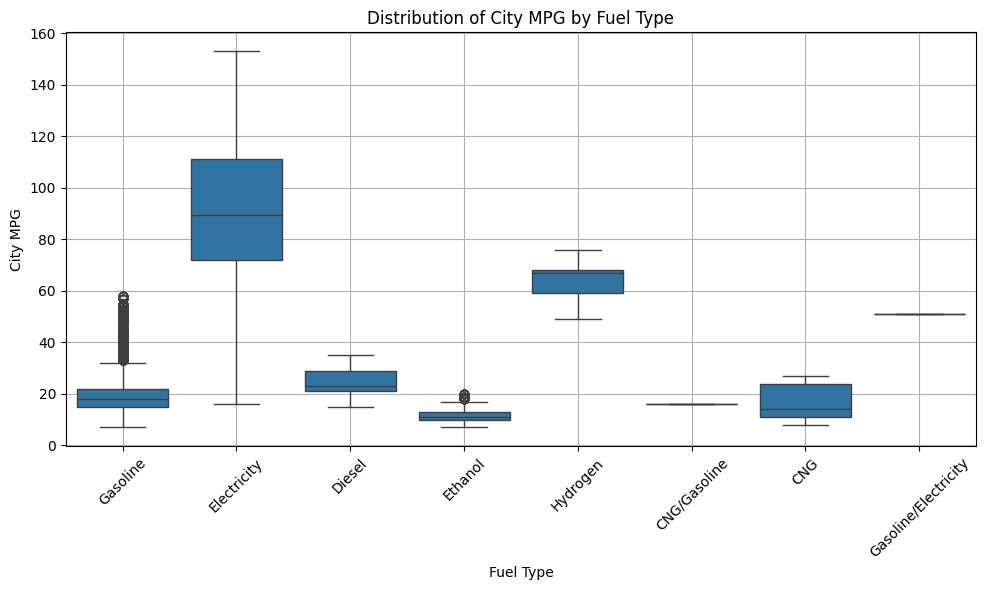

In [29]:
# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Fuel', y='City MPG')
plt.title('Distribution of City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

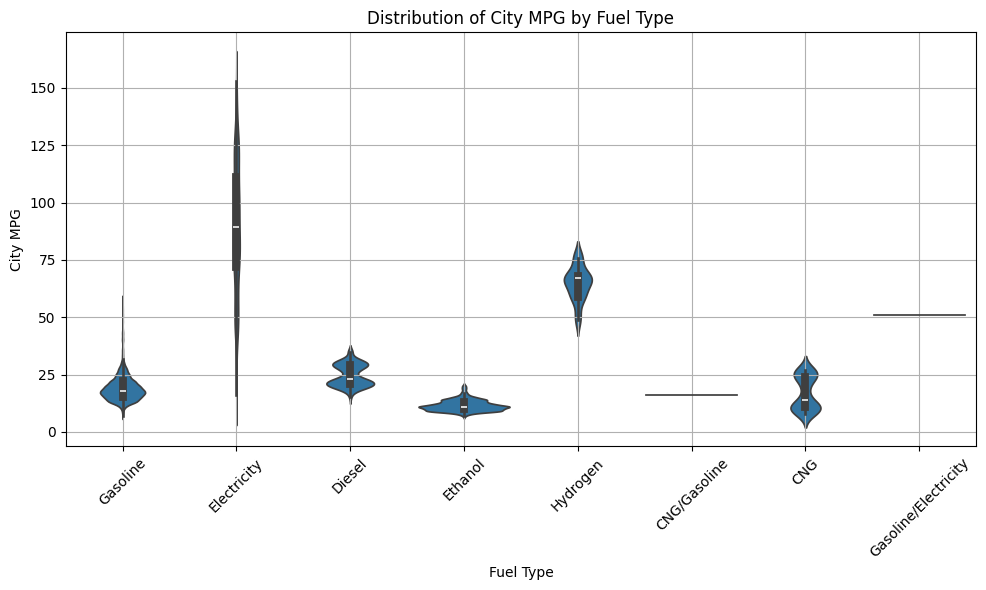

In [30]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=merged_data, x='Fuel', y='City MPG')
plt.title('Distribution of City MPG by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

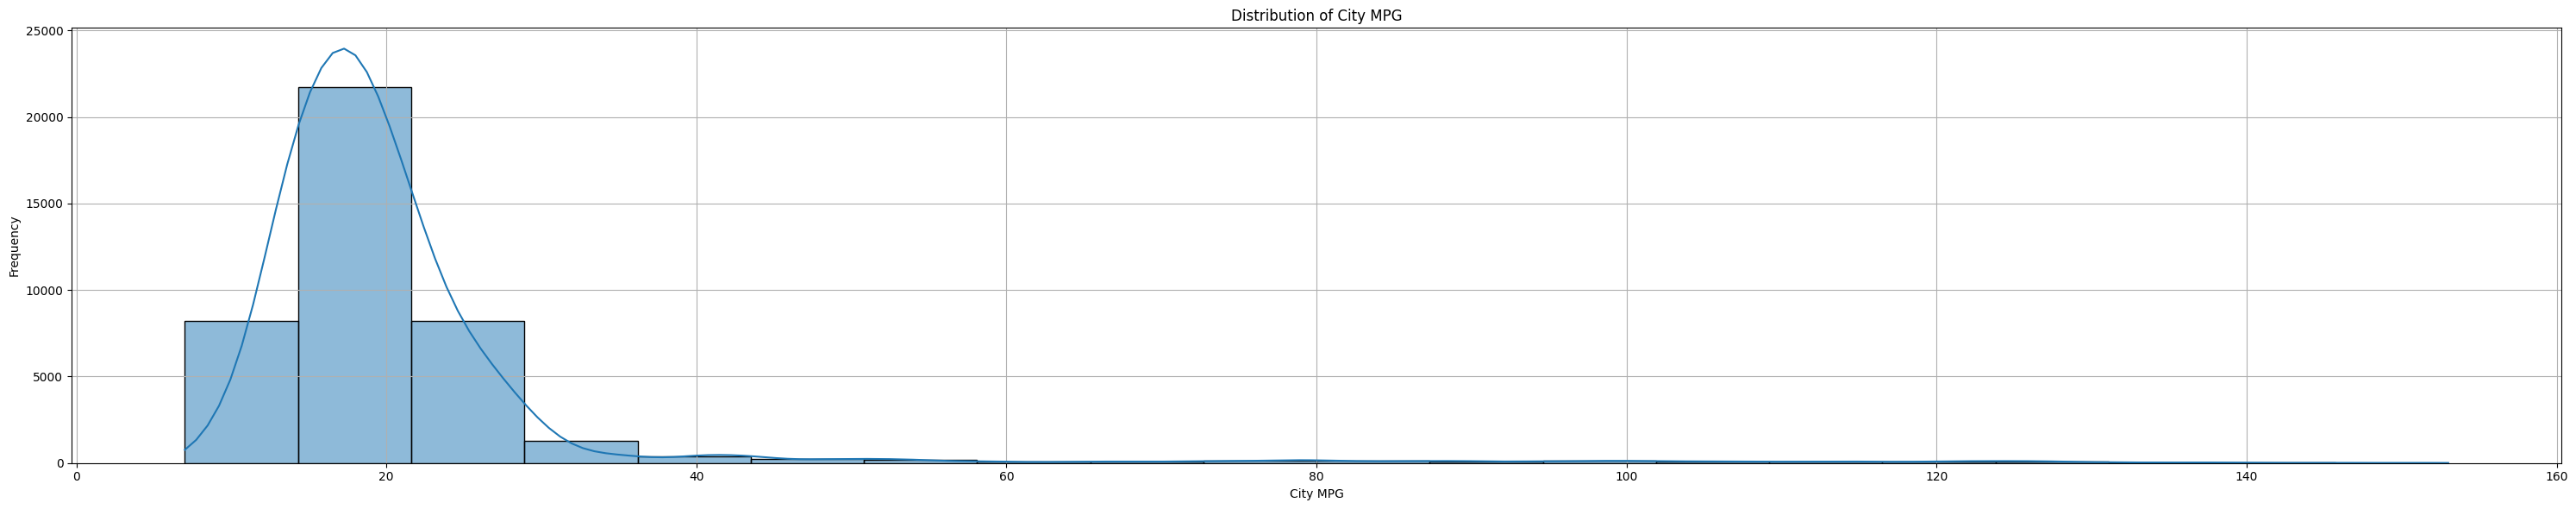

In [31]:
# Create the histogram
plt.figure(figsize=(30, 6))
sns.histplot(data=merged_data, x='City MPG', bins=20, kde=True)
plt.title('Distribution of City MPG')
plt.xlabel('City MPG')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

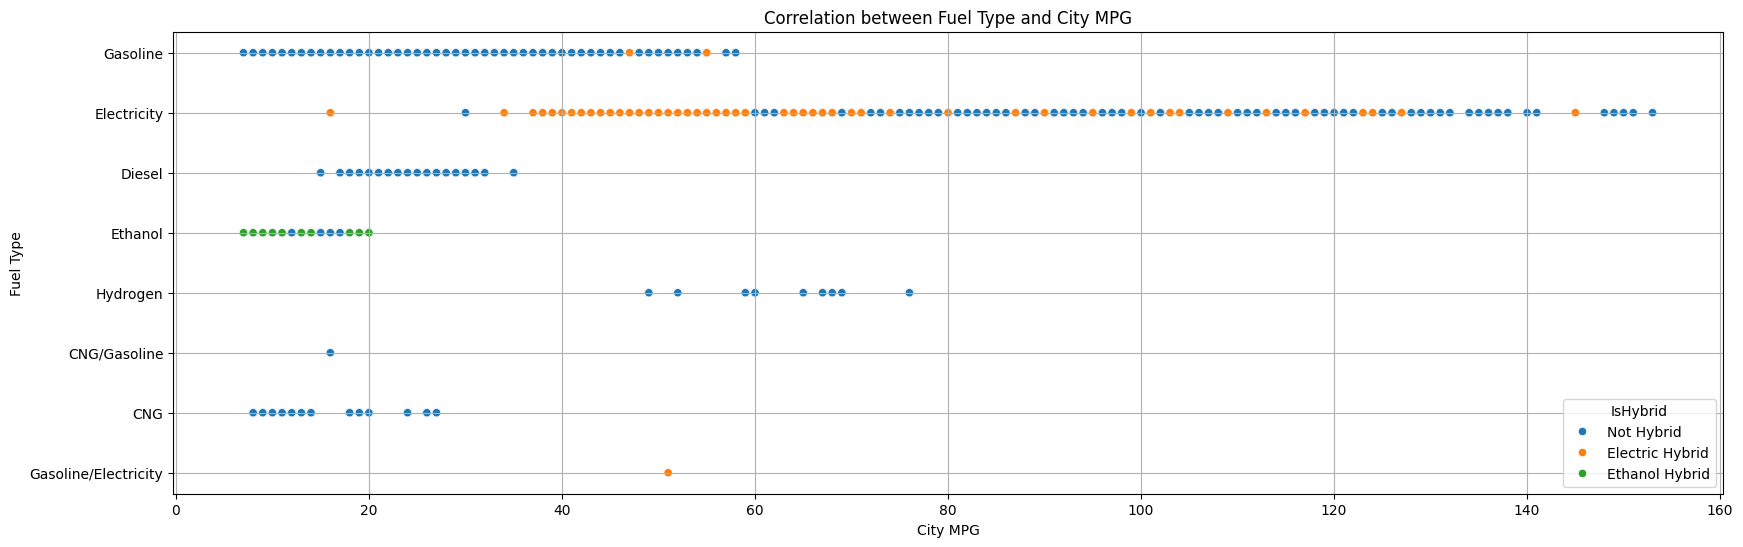

In [33]:

# Create the scatter plot
plt.figure(figsize=(20, 6))
sns.scatterplot(data=merged_data, x='City MPG', y='Fuel', hue='IsHybrid')
plt.title('Correlation between Fuel Type and City MPG')
plt.xlabel('City MPG')
plt.ylabel('Fuel Type')
plt.grid(True)

# Show the plot
plt.show()

In [35]:
# Filter the DataFrame
gasoline_electricity_rows = merged_data[merged_data['Fuel'] == 'Gasoline/Electricity']

# Print the filtered rows
print("Rows where Fuel is 'Gasoline/Electricity':")
print(gasoline_electricity_rows)

Rows where Fuel is 'Gasoline/Electricity':
       Displ  Cyl Trans Drive                  Fuel    Veh Class  \
20289    1.8  4.0   CVT   2WD  Gasoline/Electricity  midsize car   

      Air Pollution Score  City MPG Hwy MPG Cmb MPG Greenhouse Gas Score  \
20289                   9      51.0      49      50                   10   

       Year Car_Make             Car_Model         IsHybrid  
20289  2013   TOYOTA  Prius Plug-in Hybrid  Electric Hybrid  


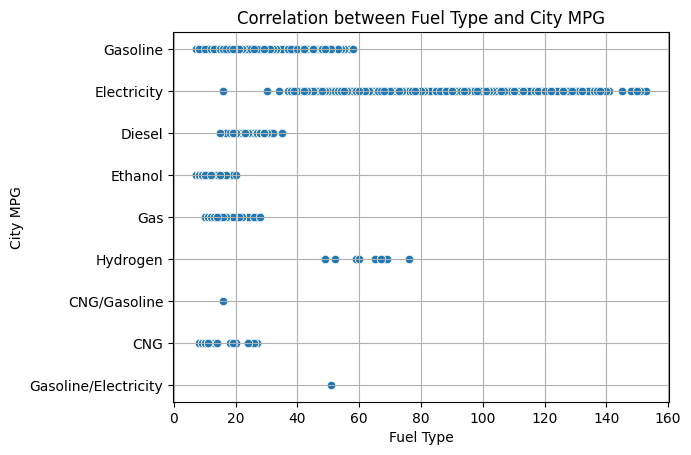

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
sns.scatterplot(data=merged_data, x='City MPG', y='Fuel')
plt.title('Correlation between Fuel Type and City MPG')
plt.xlabel('Fuel Type')
plt.ylabel('City MPG')
plt.grid(True)

# Show the plot
plt.show()

In [20]:
categorical_features = ["Trans", 
                        "Drive", 
                        "Fuel",
                        "Veh Class",
                        "Car_Make", 
                        "Car_Model",
                        "Air Pollution Score",
                        "Greenhouse Gas Score"]

numerical_features = ["Displ",                       
                      "Year",
                      "Cyl",
                      "Displ"]

In [21]:
# Define features and target
X = merged_data.drop(columns=['City MPG', 'Hwy MPG', 'Cmb MPG'])
y = merged_data['City MPG']

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from joblib import dump, load

In [23]:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


In [24]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['float', 'str']